<a href="https://colab.research.google.com/github/StefanTodorovski/SentimentAnalysis/blob/master/VNPLongCovidTweetsSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np

In [ ]:
 df= pd.read_csv('/content/gdrive/MyDrive/proekt/LongCovidSentiment3.csv')

In [ ]:
df

,User,tweet_text,sentiment
0,JodelDeauna,I can be disturbed! Just now...studies showed ...,sadness
1,DondieCox,@TheConstantCook @MartinRemains @DeborahMeaden...,sadness
2,CaroleBruce17,This makes perfect sense to totally unscientif...,sadness
3,Aineemac82,@jymjude @AlexisCrumbley It's horrible to see ...,sadness
4,inducekarmaaa,@saribethrose @bootsndiamonds Maybe #LongCovid...,anger
...,...,...,...
110539,psychoticdream1,@thepipeline7 @drdrew Roflol.\nEver heard of i...,neutral
110540,CMcVittie,Amazing as always @Dr2NisreenAlwan thanks so m...,neutral
110541,zerocovidni,Why are we happy to accept a level of death fr...,anger
110542,ellie_merton,"Well, I always knew the response to Covid was ...",anger


In [ ]:
df.isnull().sum()

User          0
tweet_text    0
sentiment     0
dtype: int64

In [ ]:
df["sentiment"].value_counts()

sadness    43831
neutral    36386
anger      30327
Name: sentiment, dtype: int64

In [ ]:
print("number of tweets: {}".format(len(df)))

number of tweets: 110544


In [ ]:
tweet_id = 43223
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: NYC people: if you had COVID at least 3 months ago and didn't develop long COVID, please join this study!!!!

You'll be helping out people like me with #LongCovid, by serving as controls for a study to help us long haulers. Thank you thank you thank you
Tweet sentiment: neutral


In [ ]:
tweet_id = 200
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: .@LinnJarte: This can be an incredibly lonely illness when you don’t have support or those around you don’t understand the illness. 

#appgoncoronavirus
#longcovid
#longcovidweek

pscp.tv/w/1vAxRwpqqbXKl
Tweet sentiment: sadness


In [ ]:
tweet_id = 110541
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: Why are we happy to accept a level of death from this? WHY ARE WE HAPPY TO SUBJECT ALL OF OUR CHILDREN AND MANY EVEN VACCINATED ADULTS TO THE RISK OF CHRONIC #LongCovid AND #ORGANDAMAGE? Why are we not doing more? #itsnotover #anychanceofaplan? @niexecutive @paulgivan @moneillsf
Tweet sentiment: anger


In [ ]:
import matplotlib.pyplot as plt


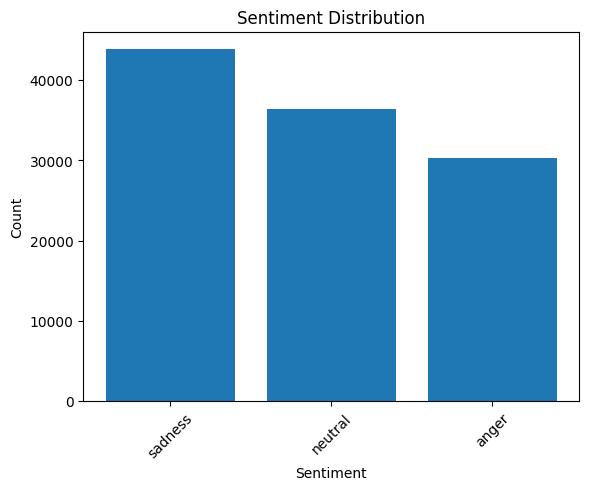

In [ ]:
sentiment_count = df["sentiment"].value_counts()
plt.bar(sentiment_count.index, sentiment_count.values)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()

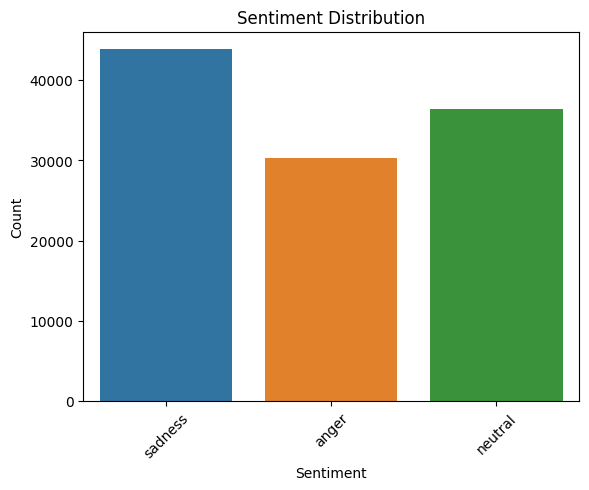

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from wordcloud import WordCloud

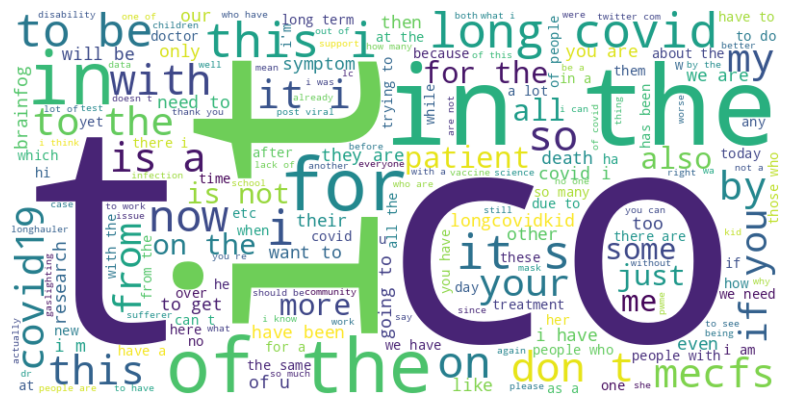

In [ ]:
pos_tweets = df[df["sentiment"] == "anger"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    stopwords=set(["longcovid","https","amp","and","or","that","but"]),
).generate(txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

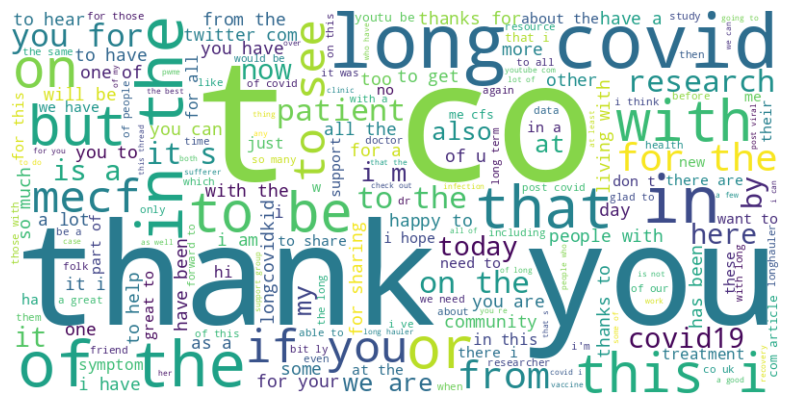

In [ ]:
pos_tweets = df[df["sentiment"] == "neutral"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    stopwords=set(["longcovid","https","and","amp"]),
).generate(txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

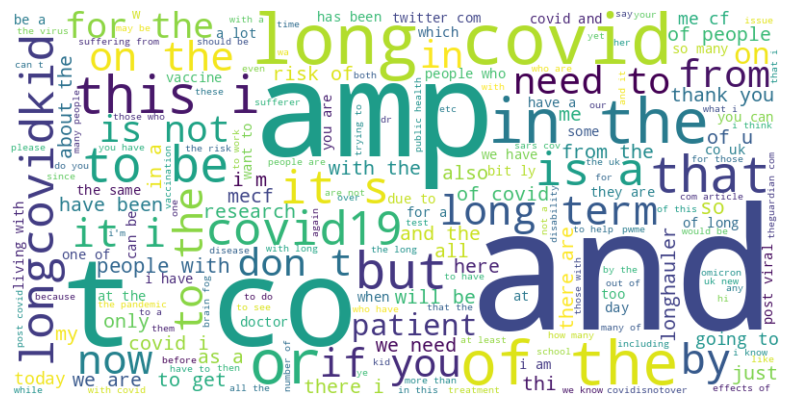

In [ ]:
pos_tweets = df[df["sentiment"] == "sadness"]
txt = " ".join(tweet.lower() for tweet in pos_tweets["tweet_text"])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="viridis",
    stopwords=set(["longcovid","https"]),
).generate(txt)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Text Normalization

In [ ]:
import re

In [ ]:
def replace_user(tweet, default_replace="twitteruser"):
  tweet = re.sub('\B@\w+', default_replace, tweet)
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(replace_user)

In [ ]:
df.sample(3)

,User,tweet_text,sentiment
23668,JCeoltaSmith,twitteruser There are many #LongCovid groups c...,sadness
1382,OnTapPhysio,Today was quite the day in #PTtwitter. Thank y...,neutral
1625,emmamzimm,This new twitteruser series on living with #Lo...,neutral


In [ ]:
pip install emoji --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
import emoji

In [ ]:
def demojize(tweet):
  tweet = emoji.demojize(tweet)
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(demojize)

In [ ]:
def replace_url(tweet, default_replace=""):
  tweet = re.sub('(http|https):\/\/\S+',default_replace, tweet )
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(replace_url)

In [ ]:
tweet_id = 43223
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: NYC people: if you had COVID at least 3 months ago and didn't develop long COVID, please join this study!!!!

You'll be helping out people like me with #LongCovid, by serving as controls for a study to help us long haulers. Thank you thank you thank you
Tweet sentiment: neutral


In [ ]:
def replace_hashtag(tweet, default_replace=""):
  tweet = re.sub('#+',default_replace, tweet)
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(replace_hashtag)

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: NYC people: if you had COVID at least 3 months ago and didn't develop long COVID, please join this study!!!!

You'll be helping out people like me with #LongCovid, by serving as controls for a study to help us long haulers. Thank you thank you thank you
Tweet sentiment: neutral


In [ ]:
def to_lowercase(tweet):
  tweet = tweet.lower()
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(to_lowercase)

In [ ]:
def punct_repetition(tweet, default_replace=""):
  tweet = re.sub(r'[\?\.\!]+(?=[\?\.\!])',default_replace, tweet)
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(punct_repetition)

In [ ]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
print(contractions.contractions_dict)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'are not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are', "

In [ ]:
def fix_contractions(tweet):
  tweet=contractions.fix(tweet)
  return tweet

In [ ]:
df["tweet_text"] = df["tweet_text"].apply(fix_contractions)

In [ ]:
tweet_id = 43223
tweet = df.iloc[tweet_id]

In [ ]:
print("Tweet: {}".format(tweet["tweet_text"]))
print("Tweet sentiment: {}".format(tweet["sentiment"]))

Tweet: nyc people: if you had covid at least 3 months ago and did not develop long covid, please join this study!

you will be helping out people like me with longcovid, by serving as controls for a study to help us long haulers. thank you thank you thank you
Tweet sentiment: neutral


Tokenization

In [ ]:
pip install nltk

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import string

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = set (stopwords.words('english'))
print(stop_words)

{'once', "doesn't", 'didn', 'y', 'are', 'a', 'below', 'her', 'and', 'again', 'to', 'during', 'down', 'but', 'most', 'isn', 'the', 'then', 'wasn', 'themselves', 'own', 'couldn', 'on', 'if', "haven't", 'there', "shan't", "she's", 'do', 'you', 'i', "you'd", 'into', 'ma', 'be', "you'll", 'where', 'mustn', 'ours', 'me', 'its', "you've", 'am', 'these', 'haven', 'needn', 'they', "shouldn't", "hasn't", 'wouldn', 'herself', 'his', 'very', 'is', 'shan', 'more', 'all', 'can', 've', 'after', 'same', 'what', 'she', 'theirs', 'm', "aren't", 'just', "you're", 'we', "that'll", "needn't", 'above', 'by', 'he', 'of', 'it', 'at', 'until', 'under', 'when', 's', 'such', 'too', 'won', 'for', 'here', 'has', 'as', 'll', "isn't", "didn't", 'don', 'had', 'those', 'no', 're', 'nor', 'them', 'before', 'up', 't', 'yourselves', 'from', 'does', 'd', 'hasn', 'this', 'doing', "don't", 'weren', 'should', "wasn't", 'while', 'was', 'few', 'other', 'some', "should've", 'against', 'doesn', 'hers', 'myself', "mightn't", 'abo

In [ ]:
def custom_tokenize(tweet,
                    keep_punct= False,
                    keep_alnum = False,
                    keep_stop = False):
  token_list = word_tokenize(tweet)

  if not keep_punct:
    token_list = [token for token in token_list
                  if token not in string.punctuation]


  if not keep_alnum:
    token_list = [token for token in token_list if token.isalpha()]

  if not keep_stop:
    stop_words=set(stopwords.words('english'))
    stop_words.discard('not')
    token_list = [token for token in token_list if not token in stop_words]

    return token_list




Lematization

LEMMATIZATION serves the same purpose as Stemming but makes use of word context

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
word_type = {"international":wordnet.ADJ,
             "companies":wordnet.NOUN,
             "had":wordnet.VERB,
             "interns":wordnet.NOUN
}

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def lemmatize_tokens(tokens,word_type,lemmatizer):
  token_list=[]
  for token in tokens:
    token_list.append(lemmatizer.lemmatize(token,word_type[token]))


  return token_list

Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer



In [ ]:
def stem_tokens(tokens,stemmer):
  token_list = []
  for token in tokens:
    token_list.append(stemmer.stem(token))
  return token_list

In [ ]:
def stem_tweet(tweet,verbose=False):

  tokens = custom_tokenize(tweet,keep_alnum=False, keep_stop=False)
  stemmer = SnowballStemmer('english')
  stem = stem_tokens(tokens,stemmer)

  return stem


Vectorization

In [ ]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 32.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
sentiment_mapping = {
    "sadness": 1,
    "neutral": 0,
    "anger": 2

}

In [ ]:
df["tokens"] = df["tweet_text"].apply(stem_tweet)
df["tweet_sentiment"] = df["sentiment"].map(sentiment_mapping)

In [ ]:
df.head()

,User,tweet_text,sentiment,tokens,tweet_sentiment
0,JodelDeauna,i can be disturbed! just now.studies showed om...,sadness,"[disturb, show, sever, delta, take, care, mild...",1
1,DondieCox,twitteruser twitteruser twitteruser jabbed peo...,sadness,"[twitterus, twitterus, twitterus, jab, peopl, ...",1
2,CaroleBruce17,this makes perfect sense to totally unscientif...,sadness,"[make, perfect, sens, total, unscientif, link,...",1
3,Aineemac82,twitteruser twitteruser it is horrible to see ...,sadness,"[twitterus, twitterus, horribl, see, mani, peo...",1
4,inducekarmaaa,twitteruser twitteruser maybe longcovid is a f...,anger,"[twitterus, twitterus, mayb, longcovid, factor...",2


In [ ]:
x = df["tokens"].tolist()
y = df["tweet_sentiment"].tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def fit_cv(tweet_corpus):
  cv_vect = CountVectorizer(tokenizer= lambda x: x,
                            preprocessor=lambda x: x)

  cv_vect.fit(tweet_corpus)
  return cv_vect

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(x,y,random_state=0, train_size=0.85)

In [ ]:
import random

In [ ]:
id = random.randint(0,len(X_train))
print("Train tweet: {}".format(X_train[id]))
print("Sentiment t: {}".format(y_train[id]))


Train tweet: ['wife', 'get', 'disabl', 'go', 'work', 'unsaf', 'condit', 'home', 'work', 'not', 'allow', 'anymor', 'get', 'disabl', 'mask', 'not', 'fit', 'face', 'well', 'not', 'notic', 'healthcar', 'profession', 'sick', 'leav', 'longcovid']
Sentiment t: 1


In [ ]:
from sklearn.linear_model import LogisticRegression

def fit_logistic_regression(X_train, y_train):
    model = LogisticRegression(multi_class='ovr')
    model.fit(X_train, y_train)
    return model


In [ ]:
cv = fit_cv(X_train)
X_train_cv = cv.transform(X_train)
X_test_cv = cv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  )


In [ ]:
model_lr_cv = fit_logistic_regression(X_train_cv,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  options={"iprint": iprint, "gtol": tol, "maxiter": max_iter},


In [ ]:
from sklearn.metrics import accuracy_score , confusion_matrix ,f1_score

In [ ]:
y_pred_lr_cv = model_lr_cv.predict(X_test_cv)

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(y_test,y_pred_lr_cv)))

LR Model Accuracy: 74.09%


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
confusion = confusion_matrix(y_test, y_pred_lr_cv)

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn


<module 'seaborn' from '/usr/local/lib/python3.10/dist-packages/seaborn/__init__.py'>

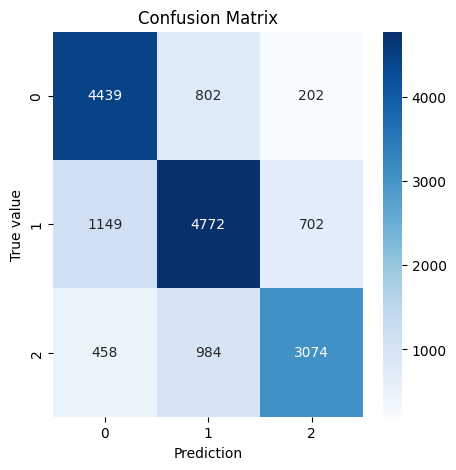

In [ ]:
plot_confusion(confusion_matrix(y_test,y_pred_lr_cv))

In [ ]:
your_tweet = """RT @Stefan: i am angry!
"""

In [ ]:
def predict_tweet(tweet):
    preprocessed_tweet = replace_user(tweet)
    stemed_tweet = stem_tweet(tweet)
    transformed_tweet = cv.transform([stemed_tweet])
    prediction = model_lr_cv.predict(transformed_tweet)

    print(preprocessed_tweet)

    if prediction == 0:
        return "Neutral sentiment"
    elif prediction == 1:
        return "Sadness sentiment"
    else:
        return "Anger sentiment"


In [ ]:
predict_tweet(your_tweet)

RT twitteruser: i am angry!



'Anger sentiment'